# 粒子群算法

## 定义函数

In [70]:
f = lambda x: x**3 - 5*x**2 - 2*x + 3
f2 = lambda x: -f(x)

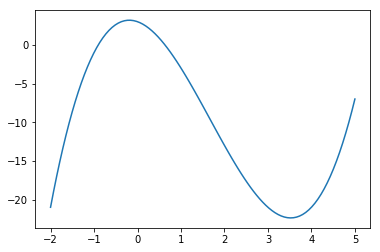

In [71]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 5, 100)
plt.plot(x, f(x));

In [86]:
from numpy.random import rand
class Node:
    def __init__(self, func):
        self._x = rand() * 7 - 2
        self.v = rand() * 0.03
        self.y = func(x)
        self.pbest = 0
        self.f = func
    
    @property
    def x(self):
        return self._x
    @x.setter
    def x(self, value):
        self._x = value
        self._x = max(min(self._x, 5), -2)
        self.y = self.f(self._x)
        self.pbest = max(self.pbest, self.y)
        
    def __repr__(self):
        return "Node(x=%s, y=%s, v=%s, pbset=%s)" % (self.x, self.y, self.v, self.pbest)
    

# 超参数
N, ITER = 2, 300   # 粒子数
c1, c2 = 2, 2
vmax = 0.1  # 设置最大速度

# 求最大值
* 使用f = lambda x: x**3 - 5*x**2 - 2*x + 3

In [92]:
nodes = [Node(f) for _ in range(N)]
gbest = -1
for _ in range(ITER):
    w = 0.9
    for node in nodes:
        node.v = w*node.v + c1*rand()*(node.pbest-node.x) + c2*rand()*(gbest-node.x)
        if node.v > vmax: node.v = vmax
        node.x = node.x + node.v
        
        gbest = max(gbest, node.y)
        w = w / 1.5   # 权重衰减

最大值为3.192644060084439

In [93]:
gbest

3.192644060084439

In [99]:
nodes

[Node(x=5, y=7, v=0.1, pbset=22.37661105151893),
 Node(x=5, y=7, v=0.1, pbset=22.37593866799782)]

# 求最小值
* 使用f2 = lambda x: -f(x)，得到的gbest也取负

In [94]:
nodes = [Node(f2) for _ in range(N)]
gbest = -1
for _ in range(ITER):
    w = 0.9
    for node in nodes:
        node.v = w*node.v + c1*rand()*(node.pbest-node.x) + c2*rand()*(gbest-node.x)
        if node.v > vmax: node.v = vmax
        node.x = node.x + node.v
        
        gbest = max(gbest, node.y)
        w = w / 1.5   # 权重衰减

最小值为-22.37661105151893

In [98]:
-gbest

-22.37661105151893

In [100]:
nodes

[Node(x=5, y=7, v=0.1, pbset=22.37661105151893),
 Node(x=5, y=7, v=0.1, pbset=22.37593866799782)]